In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import sleap, get confidence maps on some nice data, etc...

In [143]:
import os
import copy
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import toml
import h5py
from qd_analysis.fig import setup_plotting_env

In [ ]:
save_dir = "/mnt/data/jmarkow/panels/2024-06 (QD paper)"
img_dir = "/home/jmarkow/data_dir/active_projects/quantum_dots/kneejoint_cadaver/"
imgs = sorted(glob.glob(os.path.join(img_dir, "cadaver*beads*_02_*.tiff")))

In [43]:
bf_file = imgs[0]
epi_file = imgs[1]

In [44]:
import tifffile

In [48]:
with tifffile.TiffFile(bf_file) as tif:
    bf_data = tif.asarray()
with tifffile.TiffFile(epi_file) as tif:
    epi_data = tif.asarray()

In [131]:
bf_kwargs = {"vmin": 0,
             "vmax": 256,
             "cmap": "gray"}
epi_kwargs = {"vmin": 0,
              "vmax": 256,
              "cmap": "magma"}

In [132]:
bbox = [100, 1200, 750, 1300]

In [144]:
setup_plotting_env()

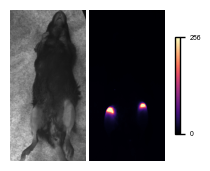

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(2.5, 2.5), sharex=True, sharey=True)
ax[0].imshow(bf_data[bbox[0]:bbox[1], bbox[2]:bbox[3]] / 256, **bf_kwargs)
g = ax[1].imshow(epi_data[bbox[0]:bbox[1], bbox[2]:bbox[3]] / 256, **epi_kwargs)
for _ax in ax:
    _ax.axis("off")
fig.subplots_adjust(wspace=.05)
cbar = fig.colorbar(g, ax=ax.tolist(), pad=.05, shrink=.5)
cbar.set_ticks([0, 256])
fig.savefig(os.path.join(save_dir, "kneejoint_hires.pdf"), bbox_inches="tight", dpi=600)